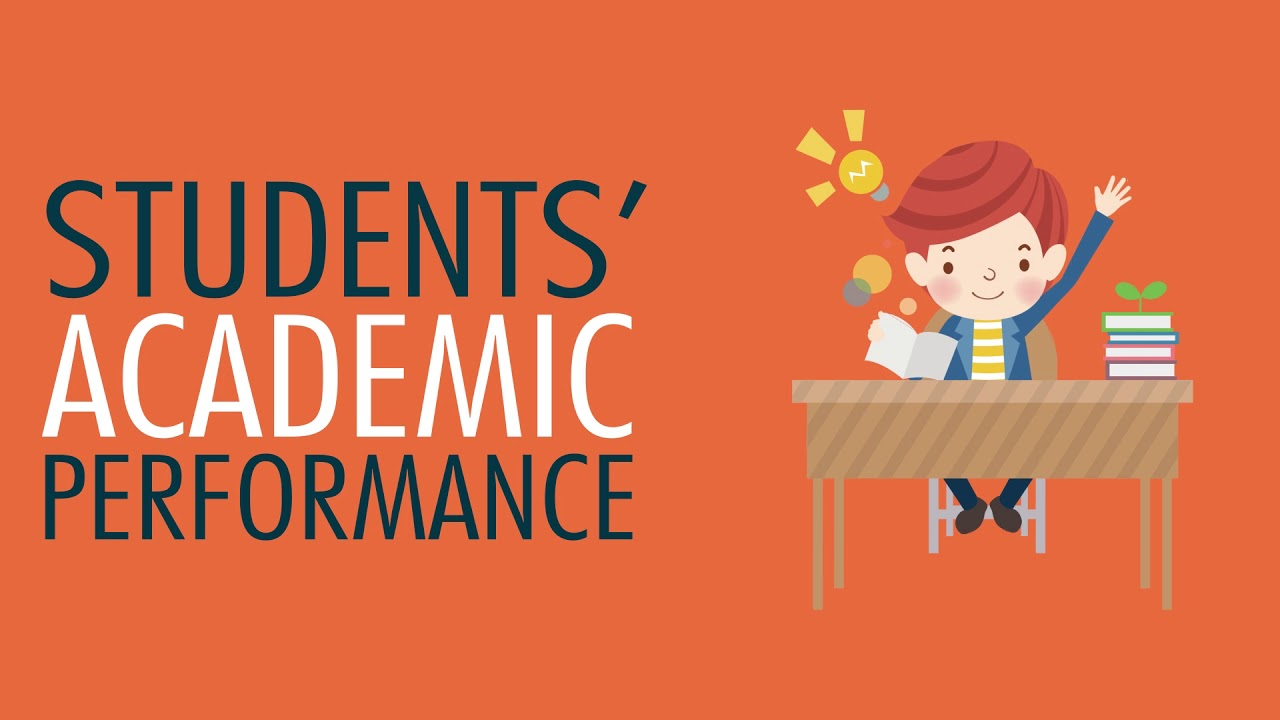

# Student Performance Model

In this notebook, we will perform Exploratory Data Analysis (EDA) and statistical hypothesis testing to investigate the following questions:

  - Is there a significant difference in GPA based on parental education?
  - Does one gender tend to perform better academically than the other?
  - Is there any relation between parental support and Grade class?

For each question, we will detail the statistical methods used and interpret the results

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('Student_performance_data _.csv')

In [120]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [121]:
df.drop(['Extracurricular','Music','Volunteering','Ethnicity'],inplace=True,axis=1)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Sports             2392 non-null   int64  
 9   GPA                2392 non-null   float64
 10  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 205.7 KB


In [123]:
df.describe()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,1.746237,9.771992,14.541388,0.301421,2.122074,0.303512,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.000411,5.652774,8.467417,0.458971,1.122813,0.459870,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,4.000000,4.000000


In [124]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Sports                 int64
GPA                  float64
GradeClass           float64
dtype: object

In [125]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Sports               0
GPA                  0
GradeClass           0
dtype: int64

In [126]:
df.duplicated().sum()

0

In [127]:
df.index

RangeIndex(start=0, stop=2392, step=1)

In [128]:
#Function to assing grade class based on gpa
def assign_grade_class(gpa):
    if gpa > 3.5:
        return 'A'
    elif gpa >= 3.0 and gpa <=3.5 :
        return 'B'
    elif gpa >=2.5 and gpa <=3.0:
        return 'C'
    elif gpa>=2.0 and gpa <=2.5:
        return 'D'
    else:
        return 'F'

In [129]:
# Assigning Grade class based on Gpa
df['GradeClass'] = df['GPA'].map(lambda x: assign_grade_class(x))

In [130]:
df.head()

,StudentID,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Sports,GPA,GradeClass
0,1001,17,1,2,19.833723,7,1,2,0,2.929196,C
1,1002,18,0,1,15.408756,0,0,1,0,3.042915,B
2,1003,15,0,3,4.210570,26,0,2,0,0.112602,F
3,1004,17,1,3,10.028829,14,0,3,0,2.054218,D
4,1005,17,1,2,4.672495,17,1,3,0,1.288061,F


## Age

In [131]:
df['Age'].isnull().sum()

0

In [132]:
print(df['Age'].mean(),df['Age'].median())

16.468645484949832 16.0


In [133]:
Age_Gender = df.groupby('Age')['Gender'].value_counts().unstack()
Age_Gender

Gender,0,1
Age,,
15,338,292
16,283,310
17,272,315
18,277,305


In [134]:
df['Age'].skew()

0.03579342435531228

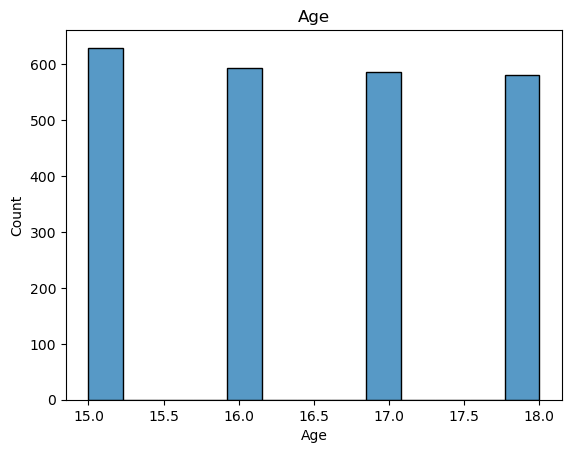

In [135]:
plt.title('Age')
sns.histplot(data = df,x = 'Age')
plt.show()

### Conclusion:
   - It has skewness of magnitude 0.03 which indicates that it is not skewed
   - It appears from from the histogram that the age feature follows uniform distribution
   - There are no missing values
   - The median age is 16
   - There are no outliers

## Gender

In [136]:
df['Gender'].isnull().sum()

0

<Axes: xlabel='Gender', ylabel='count'>

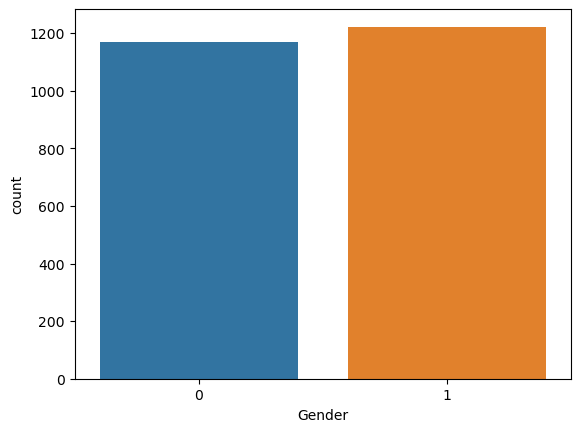

In [137]:
sns.countplot(data=df,x='Gender')

## StudyTimeWeekly

In [138]:
df['StudyTimeWeekly'].isnull().sum()

0

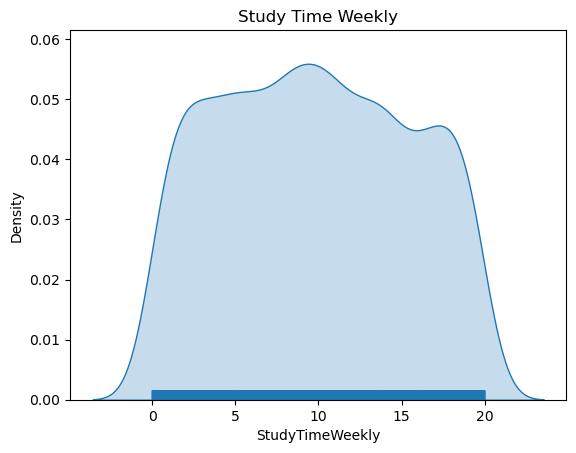

In [139]:
plt.title('Study Time Weekly')
sns.kdeplot(data=df,x='StudyTimeWeekly',fill=True)
sns.rugplot(data=df,x='StudyTimeWeekly')
plt.show()

<Axes: xlabel='StudyTimeWeekly'>

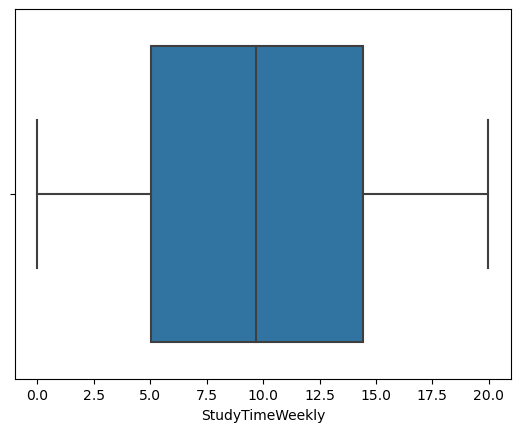

In [140]:
sns.boxplot(data=df,x='StudyTimeWeekly')

In [141]:
df['StudyTimeWeekly'].mean()

9.771991919431738

In [142]:
df['StudyTimeWeekly'].skew()

0.05006807255835409

### Conclusion:

  - It is not skewed
  - There are no outliers
  - There are no missing values
  - Mean study time per week is 9 hours
  - Data is approximately normal as kdeplot appears like bell curve with no skewness

## Sports

In [143]:
df['Sports'].isnull().sum()

0

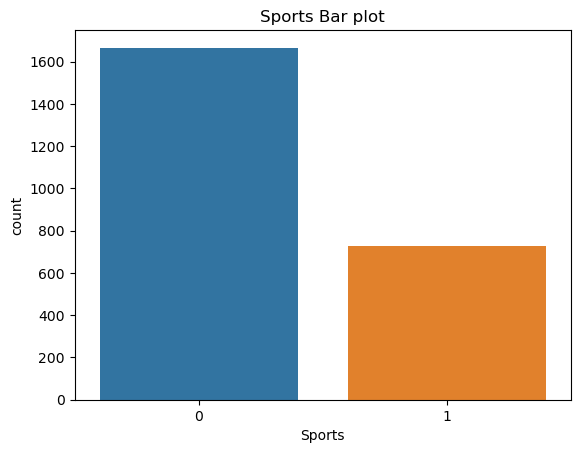

In [144]:
plt.title("Sports Bar plot")
sns.countplot(data=df,x='Sports')
plt.show()

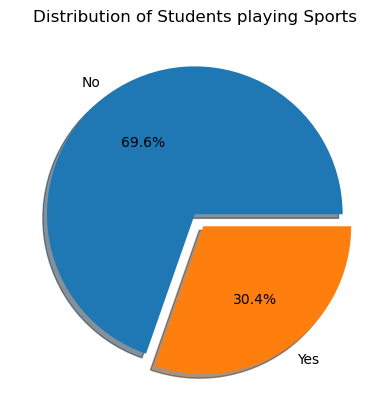

In [145]:
labels=['No','Yes']
plt.title('Distribution of Students playing Sports')
plt.pie(df['Sports'].value_counts(),labels=labels,autopct='%0.1f%%',explode=[0,0.1],shadow=True)
plt.show()

### Conclusion

  - There are no missing values
  - Only 30.4% of students play sports

## GPA And Gender

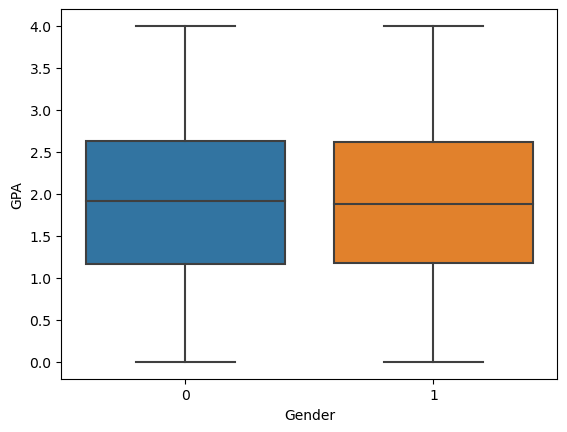

In [146]:
sns.boxplot(data=df,x='Gender',y='GPA')
plt.show()

<Axes: xlabel='Gender', ylabel='GPA'>

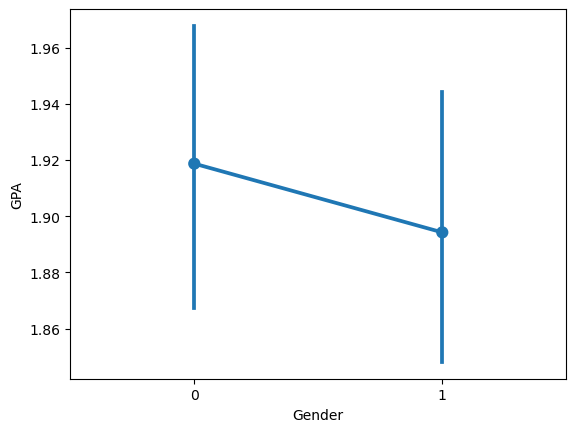

In [147]:
sns.pointplot(data=df,x='Gender',y='GPA')

In [148]:
male_gpa = df[df['Gender'] ==0] ['GPA']
female_gpa = df[df['Gender'] ==1] ['GPA']

print(f"Male GPA mean - {male_gpa.mean()}")
print(f"Female GPA mean- {female_gpa.mean()}")

Male GPA mean - 1.9186788948802054
Female GPA mean- 1.8942253102389894


- Here we observe that male gpa mean is higher than that of females now we will perform hypothesis testing to see if this difference is statistically significant

In [149]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

## Model Creation and Training

In [150]:
# Model Creation and Training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features
    ('clf', DecisionTreeClassifier())  # Decision Tree classifier
])

In [151]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform label encoding for each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features (X) and target variable (y)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y

0       2
1       1
2       4
3       3
4       4
       ..
2387    1
2388    1
2389    4
2390    4
2391    3
Name: GradeClass, Length: 2392, dtype: int32

In [152]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

## Model Evaluation

In [153]:
# Model Evaluation
y_pred = best_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

# Save the best model
joblib.dump(best_clf, 'student_performance_predictor.joblib')

Accuracy: 0.9979123173277662
Precision: 0.9979365927076759
Recall: 0.9979123173277662
F1-Score: 0.9979118566232154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        49
           2       1.00      0.99      0.99        80
           3       0.99      1.00      0.99        85
           4       1.00      1.00      1.00       249

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



['student_performance_predictor.joblib']

             Feature  Importance
9                GPA         1.0
0          StudentID         0.0
1                Age         0.0
2             Gender         0.0
3  ParentalEducation         0.0
4    StudyTimeWeekly         0.0
5           Absences         0.0
6           Tutoring         0.0
7    ParentalSupport         0.0
8             Sports         0.0


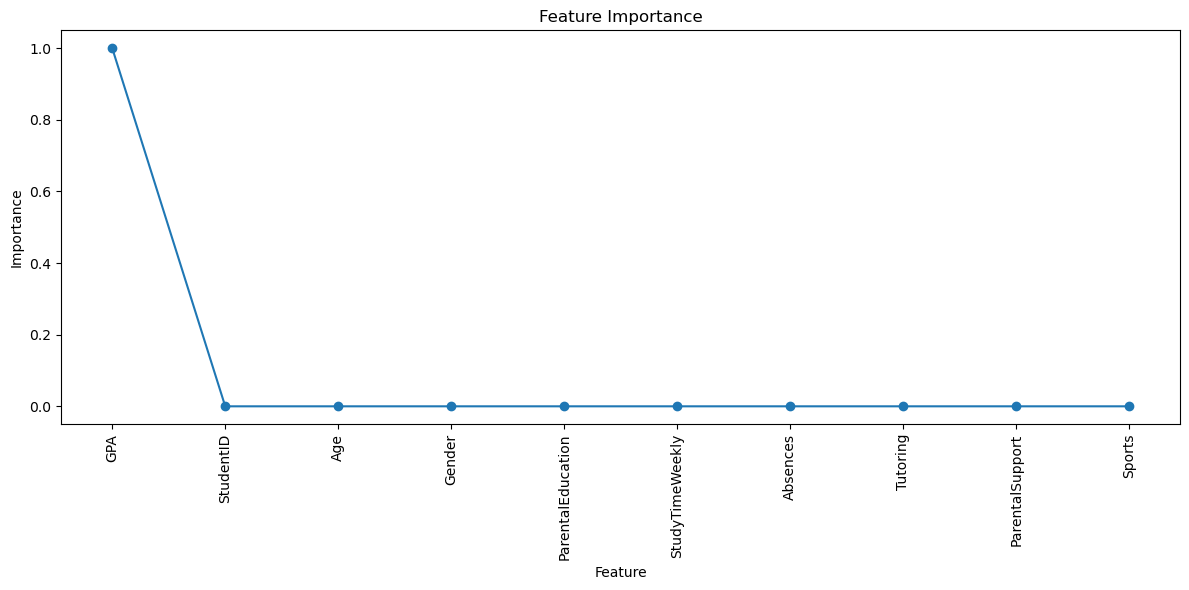

In [154]:
# Feature Importance
feature_importances = best_clf.named_steps['clf'].feature_importances_
feature_names = X_train.columns  # Assuming X_train is your training features after label encoding
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values('Importance', ascending=False)
print(feature_importance_df)


# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('feature_importance.jpg', dpi=600)
plt.show()

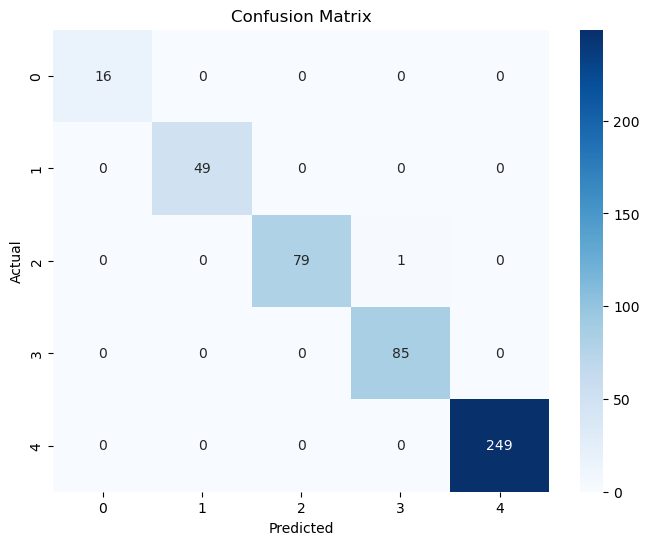

In [155]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', dpi=600)
plt.show()

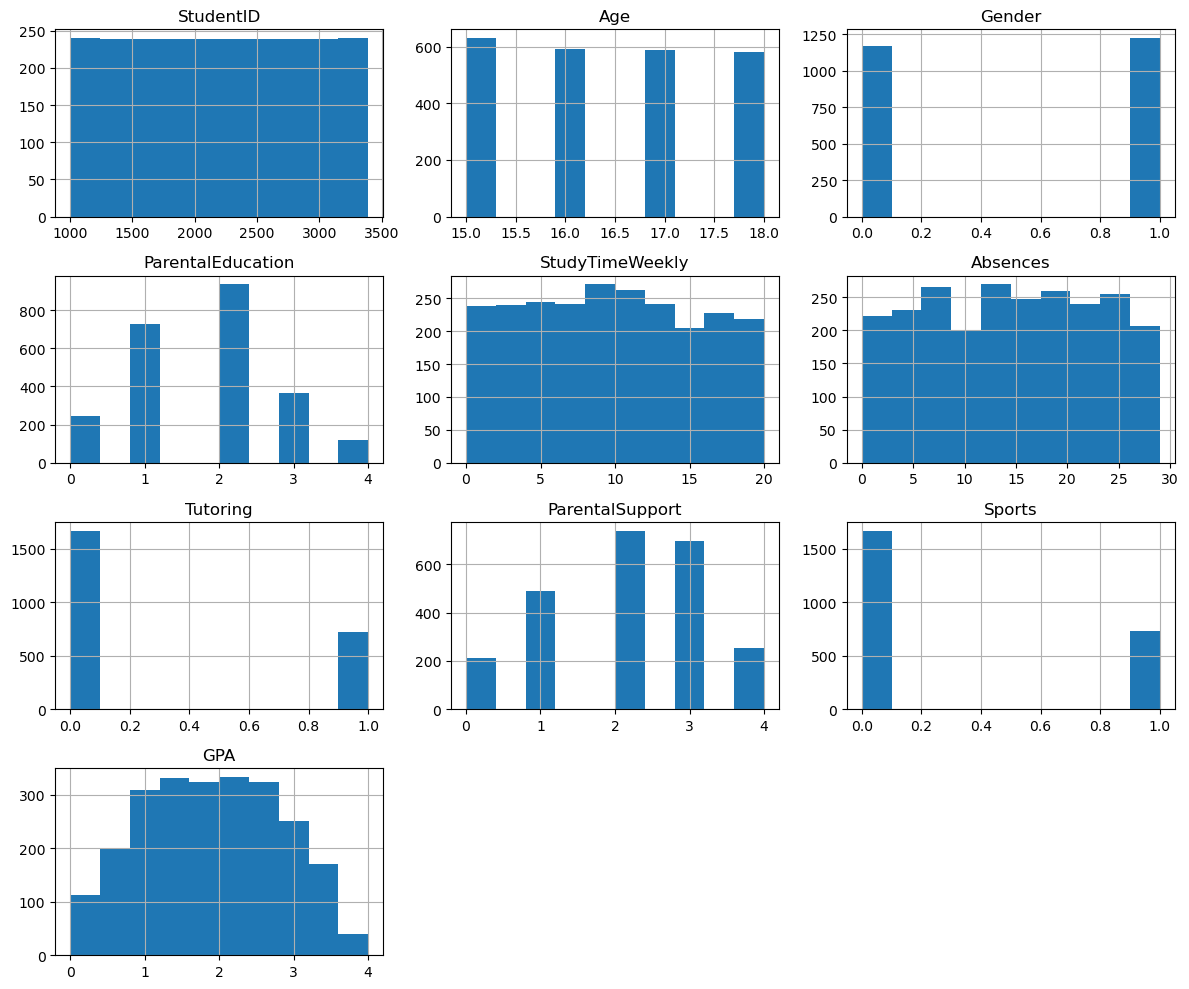

In [156]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('feature_visualizations.jpg', dpi=600)
plt.show()

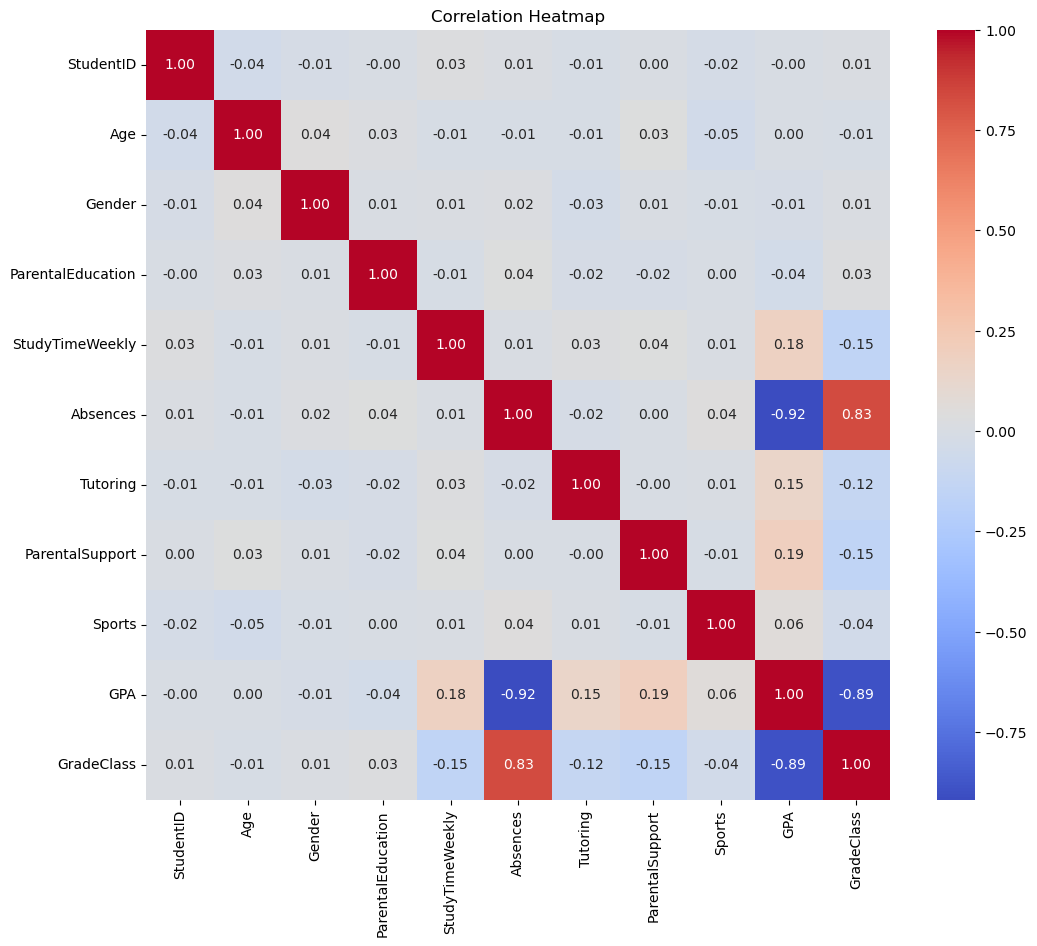

In [157]:
# Plot correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', dpi=600)
plt.show()

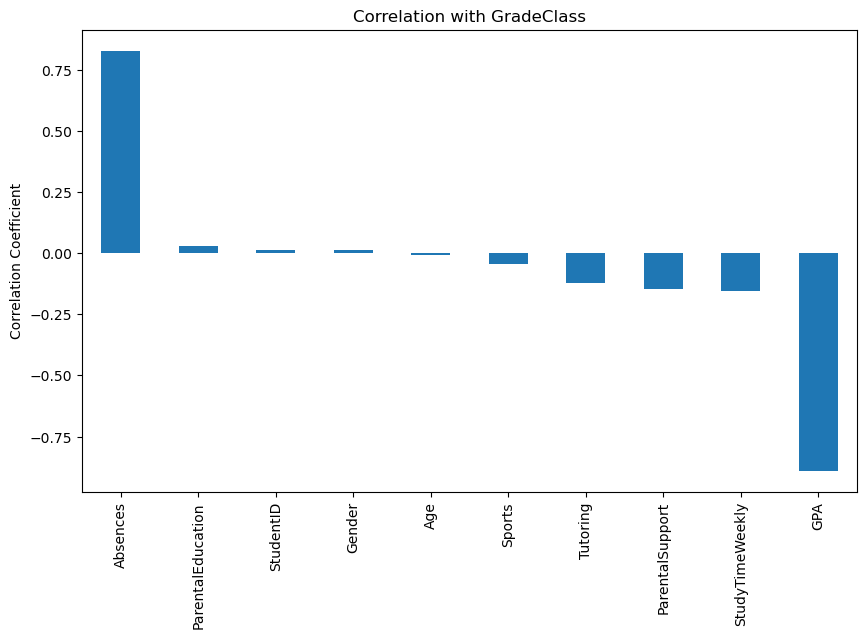

In [158]:
# Find correlations with Performance
correlations = df.corr()['GradeClass'].drop('GradeClass')
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with GradeClass')
plt.ylabel('Correlation Coefficient')
plt.savefig('feature_correlation.jpg', dpi=600)
plt.show()

## Test the Model

In [159]:
# Load the test dataset
df_test = X_test

# Apply label encoding to categorical variables
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoders[column].transform(df_test[column])

# Make predictions on the test dataset
y_pred_test = best_clf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred_test))
print("Precision on Test Data:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall on Test Data:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-Score on Test Data:", f1_score(y_test, y_pred_test, average='weighted'))
print(classification_report(y_test, y_pred_test))

Accuracy on Test Data: 0.9979123173277662
Precision on Test Data: 0.9979365927076759
Recall on Test Data: 0.9979123173277662
F1-Score on Test Data: 0.9979118566232154
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        49
           2       1.00      0.99      0.99        80
           3       0.99      1.00      0.99        85
           4       1.00      1.00      1.00       249

    accuracy                           1.00       479
   macro avg       1.00      1.00      1.00       479
weighted avg       1.00      1.00      1.00       479



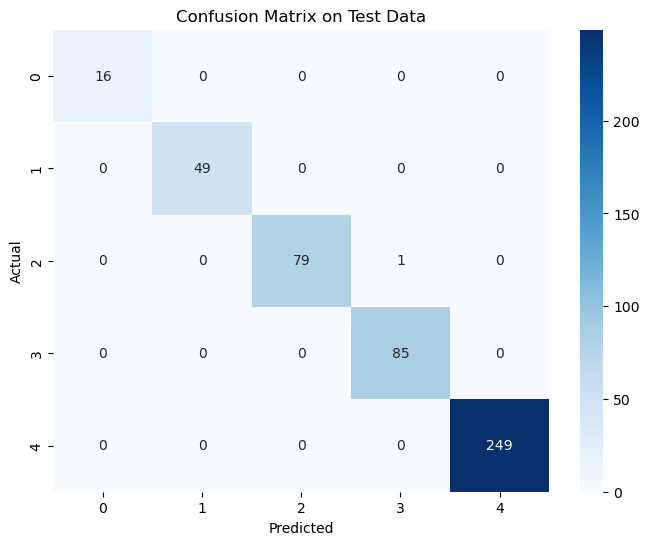

In [160]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.savefig('confusion_matrix_test.jpg', dpi=600)
plt.show()